<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [1]:
#@title Current Date
Today = '2021-10-19' #@param {type:"date"}


In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "1" #@param {type:"string"}
Student_ID_Name = "20214537 Tom Keane" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
#@markdown ---

In [3]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = "Final" #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [4]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [6]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

import seaborn as sns

In [7]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [9]:
!pip install gpy

     |████████████████████████████████| 959 kB 5.0 MB/s 
     |████████████████████████████████| 71 kB 8.7 MB/s 
  Created wheel for gpy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565110 sha256=32344063a64e77e6b9908e5ccf8b04fb59aadf5d48ac9de275c518ba125abcde
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102565 sha256=3039c391e44af1f8053e4824d97b6c590830449673c198f8f3064886df4bc492
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built gpy paramz


In [10]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [11]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

In [12]:
def import_datasets(git_link = 'https://raw.githubusercontent.com/tomkeane07/AI-Projects-UL/Etivity3/semester3/MachineLearningApplications/E3/'):
  return {
      'Test'  : pd.read_csv(git_link+'HousePrice_Test.csv'),
      'Train' : pd.read_csv(git_link+'HousePrice_Train.csv'),
      'true_price'  : pd.read_csv(git_link+'sample_submission.csv')}
def sort_columns(df):
  return df.reindex(sorted(df.columns), axis=1)

def hide_one_hot_encoded_cols(df):
  return df.loc[:, ~df.columns.str.startswith('Location') & 
                      ~df.columns.str.startswith('Type')]


try:
  dbs
except:
  dbs = import_datasets()

dftest  =  dbs['Test' ]
dftrain =  dbs['Train']
dfcost = dbs['true_price']
dftest['Price'] = dfcost['Price']

df0 = sort_columns(dftrain.append(dftest))

In [13]:
display(df0.tail())

,BER_class,Description,Features,ID,Index,Latitude,Location,Longitude,Num_Bathrooms,Num_Beds,Price,Services,Surface,Type
697,G,Sherry FitzGerald is delighted to present 56 B...,Secure gated and well maintained development\n...,12392566,2336,53.343377,Kilmainham,-6.296654,1,1,3835888.0,NaN,40.0,apartment
698,D2,26 Viking Road is a well presented and moderni...,Well presented and modernised extended two bed...,12352487,2337,53.351074,Stoneybatter,-6.285557,1,2,1106700.0,NaN,57.0,terraced
699,D1,FIRST OPEN VIEW SATURDAY 8TH FEBRUARY 11 - 11....,None,12387290,2338,53.261710,Cabinteely,-6.164979,1,3,1103343.0,"Parking,Gas Fired Central Heating",93.0,semi-detached
700,NaN,DNG are delighted to represent the sale of 109...,Gas fired central heating.\nFully renovated an...,12382807,2339,53.360515,Clontarf,-6.189661,2,3,1273647.0,NaN,118.0,terraced
701,F,This is an instantly appealing Jennings built ...,Drenched in natural light\nSuperb blank canvas...,12393769,2340,53.280408,Glenageary,-6.132925,1,3,1820012.0,NaN,122.0,semi-detached


In [14]:
display(df0.describe())

print("\n\nmissing values _ %")
print(df0.isna().sum()* 100 / len(df0))
print("_________\nunique values")
print(df0.nunique(axis=0))

,ID,Index,Latitude,Longitude,Num_Bathrooms,Num_Beds,Price,Surface
count,2.340000e+03,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2.338000e+03,2340.000000
mean,1.231814e+07,1170.500000,53.350464,-6.254283,2.046154,3.026496,1.168656e+06,158.459546
std,1.439340e+05,675.644137,0.075966,0.130826,1.192648,1.327893,1.275073e+06,1509.949934
min,1.118567e+07,1.000000,52.501856,-6.521183,1.000000,1.000000,1.999500e+04,3.400000
25%,1.228052e+07,585.750000,53.294706,-6.308530,1.000000,2.000000,3.300000e+05,73.000000
50%,1.238029e+07,1170.500000,53.341213,-6.247780,2.000000,3.000000,5.400000e+05,97.750000
75%,1.240470e+07,1755.250000,53.381988,-6.189027,3.000000,4.000000,1.573798e+06,136.002500
max,1.242836e+07,2340.000000,53.630588,-1.744995,18.000000,27.000000,8.900000e+06,72236.387140




missing values _ %
BER_class        15.34188
Description       0.00000
Features          0.00000
ID                0.00000
Index             0.00000
Latitude          0.00000
Location          0.00000
Longitude         0.00000
Num_Bathrooms     0.00000
Num_Beds          0.00000
Price             0.08547
Services         64.82906
Surface           0.00000
Type              0.00000
dtype: float64
_________
unique values
BER_class          16
Description      2338
Features         1622
ID               2340
Index            2340
Latitude         2269
Location          148
Longitude        2277
Num_Bathrooms      11
Num_Beds           12
Price             967
Services           33
Surface           859
Type               10
dtype: int64


##### Initial inspection of Data

The only columns with missing values are Price, BER_class (\~15%) and Services(\~65%).

BER can easily replaced with the most common value. The low number of missing's will ensure it doesn't have too big an effect on the datset. A more sophisticated method of classification involving NLP analysis and looking at other factors such as Surface is also an option, but would involve a bit more overhead.

Price has only a few missing, which can simply be dropped

Services has many missing values, and perhaps dropping the column could be justified, but it is also possible that having no listed services is in itself a relevant datapoint. It is for this reason thar tthis column will be kept, and encoded into a more useful metric below in the **sort_Services** function.

Type and Location will receive one-hot-encoding. Location however stores too many values to keep all of them, so rarer values will be set as **other**. The threshold for rareness will be specified in the **otherise_rares** function. Type only has ten unique values and can receive simple one-hot-encoding.

In [15]:
def inspect_data(df, dropcols):
  df = df.drop(df[dropcols], axis=1)
  sns.pairplot(data=df.dropna())
  plt.show()
  display(df.describe())

def print_text_col_examples(df):
  cols = df[['Description', 'Features', 'Services']].notna()
  print("Description")
  print(df[['Description']][cols].tail(5).values, end='\n\n')

  print('Features')
  print(df[['Features']][cols].tail(5).values, end="\n\n")

  print('Services')
  print(df[['Services']][cols].tail(5).values, end="\n\n")

print_text_col_examples(df0)

Description
[['Sherry FitzGerald is delighted to present 56 Bow Bridge Place to the market. A wonderful opportunity to acquire this well presented one bedroom ground floor apartment ideally situated within this popular development, close to the City Centre. No. 56 is sure to appeal to a wide audience of buyers from someone looking to buy their first home, looking to trade down or indeed an astute investor looking for an investment opportunity.\n\nThe apartment is practically designed, the accommodation briefly comprises: entrance hall with storage room, open plan living/dining room providing direct access out to the front of the apartment block, fully fitted kitchen, one double bedroom and a main bathroom. \n\nBow Bridge is a fine development ideally located in the heart of Kilmainham, a cultural location within Dublin city within distance of a host of a local amenities and public transport. Local attractions include the Museum of Modern Art, Kilmainham Gaol Museum., The Royal Kilmainh

In [16]:
df0.drop_duplicates(subset=['BER_class'])['BER_class']

0                       C3
1                       D1
2                       A3
3                       E1
7                      NaN
10                       G
11                      E2
15                      C2
16     SINo666of2006exempt
19                       F
24                      B2
27                      C1
36                      D2
63                      B3
146                     B1
184                     A2
800                     A1
Name: BER_class, dtype: object

#### Data Pre-Processing

Logic and justifications of processing steps taken are flesshed out in the **Initial Inspection of Data** discussion.

In [17]:
dropcols = ['Index', 'ID']

def drop_cols(df, dropcols):
  print("dropping", end=" ")
  for col in dropcols:
    print(col, end=", ")
    df.drop(col, axis=1, inplace=True)
  print("...")
  return df

def col_to_colCount(df, col, divider):
  #this is designed for features and facilities to convert it to a rough count
  # of features, based on how they're typically listed in the df
  print("extracting "+col +"...")
  df[col] = df[col].fillna("")
  df[col+"_count"] = df[col].apply(lambda x: x.count(divider)+1)
  return df

def sort_Services(df, col):
  # Courtesy of Tim Hrisikos
  print(f"extracting {col}...")
  df[col] = df[col].fillna("")
  df = df.join(
      df[col].str.extractall('([^,]+)')[0].groupby(level=0).apply(pd.value_counts).unstack(fill_value=0).add_prefix('Service_')
      )
  df.drop('Services', axis=1, inplace=True)
  return df

BER_class_mapper = {
    #Thanks Nigel Portley
    "SINo666of2006exempt": 1,
    "A1": 2,
    "A2": 3,
    "A3": 4,
    "B1": 5,
    "B2": 6,
    "B3": 7,
    "C1": 8,
    "C2": 9,
    "C3": 10,
    "D1": 11,
    "D2": 12,
    "E1": 13,
    "E2": 14,
    "F": 15,
    "G": 16
}


# func that returns a dummified DataFrame of significant dummies in a given column
# https://stackoverflow.com/questions/18016495/get-subset-of-most-frequent-dummy-variables-in-pandas
def otherise_rares(dummy_col, threshold=0.01):
    # removes the bind
    dummy_col = dummy_col.copy()
    # what is the ratio of a dummy in whole column
    count = pd.value_counts(dummy_col) / len(dummy_col)
    # cond whether the ratios is higher than the threshold
    mask = dummy_col.isin(count[count > threshold].index)
    # replace the ones which ratio is lower than the threshold by a special name
    dummy_col[~mask] = "others"
    return dummy_col

def onehotencode(df, col, drop_first=True, otherise_rares_=False):
  if otherise_rares_:
    df[col] = otherise_rares(df[col])
  print("one hot encoding " + col)
  return pd.get_dummies(df, columns=[col], 
                        dummy_na=True, 
                        drop_first=drop_first)

def remove_locations_outside_Ire(df):
  # Carlos Siqueira Do Amaral noticed that there are entries from outside of Ireland.
  # This fiunction removes locations outside of Ireland's lat/ long bounds
  print("removing locations outside of Ireland")
  long0, lat0, long1, lat1 = (-9.97708574059, 51.6693012559, -6.03298539878, 55.1316222195)
  return df.loc[(df['Longitude'] > long0) & (df['Latitude'] > lat0)  & (df['Longitude'] < long1) & (df['Latitude'] < lat1)]

def frame_coordinates_to_dublin_center(df, ):
  print("centering coordinates around dublin city center")
  dublat, dublong = 53.350140, -6.266155
  df['Dist_from_dub_center'] = (df.Longitude - dublong)**2 +(df.Latitude - dublat)**2
  df['Latitude'] = df.Latitude - dublat
  df['Longitude'] = df.Longitude - dublong
  return df

def treat_data(df, dropcols = [], display_=True):
  # dropping columns listed below
  try:
    df = drop_cols(df, dropcols)
  except:
    pass
  #filling values. Justifications outlined in Initial datasets inspection
  # - Only two columns with missing values, which recieve imputation. Price only value which needs dropnas
  print("dropping missing values ", end="")
  dropnas = ["Price"]
  for d in dropnas:
    print(d)
    df = df.dropna(subset=[d])
  #converting features. Justifications outlined in Initial datasets inspection
  
  df = sort_Services(df, 'Services')
  print("mapping BER_class")
  df['BER_class'] = df['BER_class'].replace(BER_class_mapper)
  df['BER_class'].fillna(df['BER_class'].mode(), inplace=True)
  df = onehotencode(df, 'Location', False, True)
  df = onehotencode(df, 'Type', False)
  df.fillna(0,inplace=True)
  # a couple of extra columns added based on local features.
  df = remove_locations_outside_Ire(df)
  df = frame_coordinates_to_dublin_center(df)
  df = sort_columns(df)
  try:
    df = df[(df.Price > 0)]
  except:
      pass
  if display_:
    print("\n\ndisplaying data minus one_hot_encoded columns")
    display(hide_one_hot_encoded_cols(df).tail())
  X = df.drop("Price", axis = 1)
  y = df["Price"]
  return df, X, y

In [18]:
display(df0.tail(0))

,BER_class,Description,Features,ID,Index,Latitude,Location,Longitude,Num_Bathrooms,Num_Beds,Price,Services,Surface,Type


In [19]:
df, X, y = treat_data(df0, dropcols)

dropping Index, ID, ...
dropping missing values Price
extracting Services...
mapping BER_class
one hot encoding Location
one hot encoding Type
removing locations outside of Ireland
centering coordinates around dublin city center


displaying data minus one_hot_encoded columns


,BER_class,Description,Dist_from_dub_center,Features,Latitude,Longitude,Num_Bathrooms,Num_Beds,Price,Service_Alarm,Service_Gas Fired Central Heating,Service_Oil Fired Central Heating,Service_Parking,Service_Wheelchair Access,Service_Wired for Cable Television,Surface
1633,9.0,Built in c.1930 38 Stradbrook Road is a deligh...,0.013189,Extremely convenient location \nWheelchair acc...,-0.057373,0.099487,1,2,500000.0,1.0,1.0,0.0,1.0,1.0,0.0,64.00
1634,8.0,An impressive three-story family home superbly...,0.011897,Gas fired central heating with underfloor heat...,-0.065165,0.087470,3,5,795000.0,0.0,0.0,0.0,0.0,0.0,0.0,175.96
1635,4.0,DNG Lucan's leading estate agents are delighte...,0.028605,None,0.001527,-0.169123,2,3,340000.0,0.0,0.0,0.0,0.0,0.0,0.0,98.00
1636,12.0,Holyrood Castle is a most distinctive 19th cen...,0.002483,None,-0.021143,0.045125,8,8,2500000.0,0.0,0.0,0.0,0.0,0.0,0.0,507.00
1637,13.0,A superb opportunity awaits to acquire this be...,0.034009,Turn key condition\nWood burning stove\nSlider...,-0.118702,0.141133,2,2,370000.0,0.0,0.0,0.0,0.0,0.0,0.0,50.00


In [20]:
print("all columns in df")
display(df.tail(0))

all columns in df


,BER_class,Description,Dist_from_dub_center,Features,Latitude,Location_Artane,Location_Balbriggan,Location_Ballsbridge,Location_Blackrock,Location_Castleknock,Location_Clondalkin,Location_Clonsilla,Location_Clontarf,Location_Dalkey,Location_Donnybrook,Location_Drumcondra,Location_Dublin 1,Location_Dublin 2,Location_Dublin 8,Location_Dun Laoghaire,Location_Dundrum,Location_Finglas,Location_Foxrock,Location_Glasnevin,Location_Howth,Location_Killiney,Location_Knocklyon,Location_Lucan,Location_Malahide,Location_Raheny,Location_Rathfarnham,Location_Sandyford,Location_Sandymount,Location_Santry,Location_Swords,Location_Tallaght,Location_Terenure,Location_nan,Location_others,Longitude,Num_Bathrooms,Num_Beds,Price,Service_Alarm,Service_Gas Fired Central Heating,Service_Oil Fired Central Heating,Service_Parking,Service_Wheelchair Access,Service_Wired for Cable Television,Surface,Type_apartment,Type_bungalow,Type_detached,Type_duplex,Type_end-of-terrace,Type_nan,Type_semi-detached,Type_site,Type_studio,Type_terraced,Type_townhouse


BER_class               0
Description             0
Dist_from_dub_center    0
Features                0
Latitude                0
                       ..
Type_semi-detached      0
Type_site               0
Type_studio             0
Type_terraced           0
Type_townhouse          0
Length: 61, dtype: int64


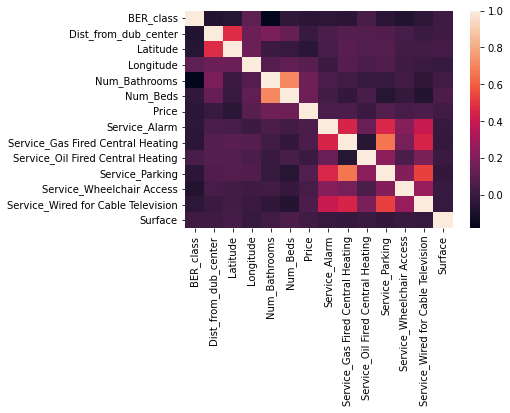

In [21]:
print(df.isna().sum())
display(sns.heatmap(hide_one_hot_encoded_cols(df).corr()))

### Outliers

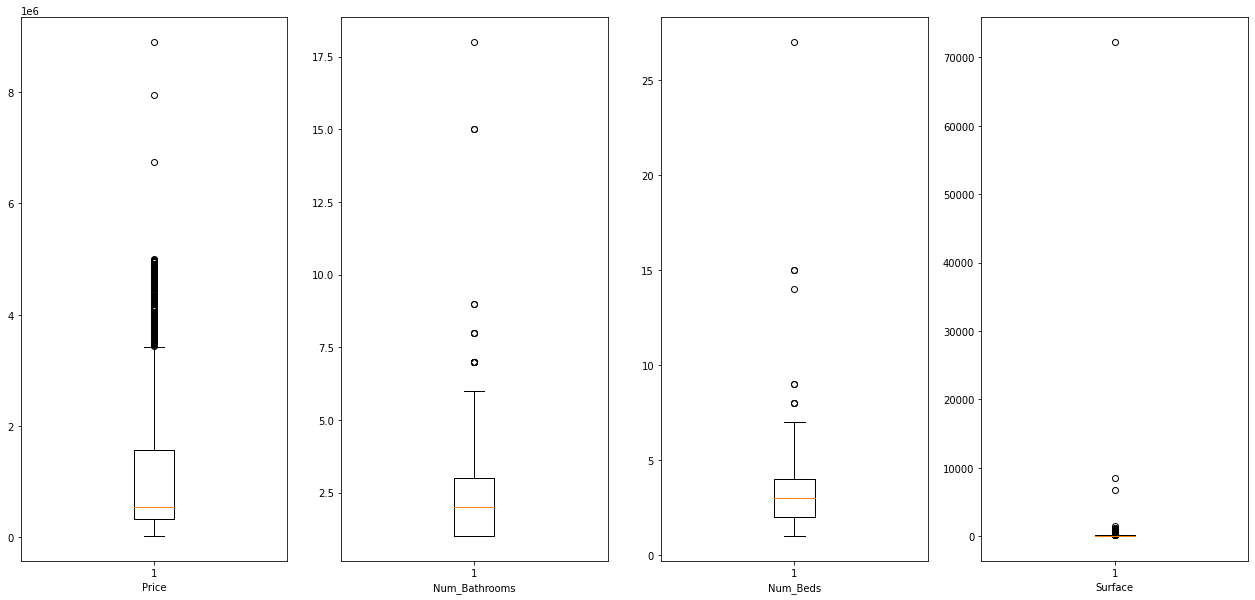

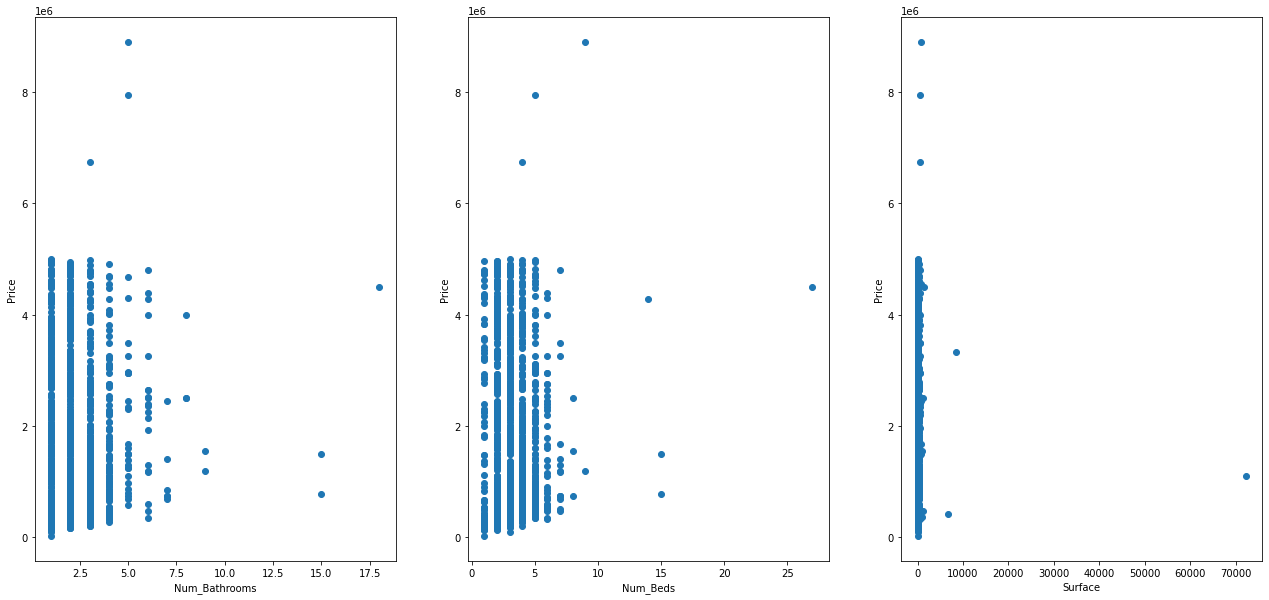

In [22]:
def Outlier_analysis(df, cols):
  boxplots(df, cols)
  scatterplot(df, cols)

def boxplots(df, cols):
  f, axes = plt.subplots(1, 4, figsize=(22, 10))
  for col, ax in zip(cols, axes.flatten()):
    ax.boxplot(df[col])
    ax.set_xlabel(col)
  plt.show()

def scatterplot(df, cols):
  f, axes = plt.subplots(1, 3, figsize=(22, 10))
  for col, ax in zip(cols[1:], axes.flatten()):
    ax.scatter(df[col], df['Price'])
    ax.set_xlabel(col)
    ax.set_ylabel('Price')
  plt.show()



Outlier_analysis(df, np.array(['Price','Num_Bathrooms','Num_Beds', 'Surface']))

Price has extreme outliers beyond 4e6 Euro. These will be removed to give a more balanced dataset.

Surface has outliers which exceede the 75th percentile by by a factor ~100. This will need to be addressed, so these values will be rmeoved also.

Num beds and bathrooms have a smaller number of outliers, and may be explained by other features, such as property type, however their removal may make the dataset more predictable, so they'll be going.

In [23]:
#Remove Outliers
df = df.loc[df.Surface < 5000]
df = df.loc[df.Num_Bathrooms < 10]
df = df.loc[df.Num_Beds < 10]
df = df.loc[df.Price < 400000]

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

Description and Features are two columns which have potential for NLP. Though **Services** is also a text based feature, it is simply listing utilities availiable at each property, and does not illicit any descriptive or connotative language which would be useful for NLP.
Similarly **Location** not a useful column.

Description and Features will be combined into one column, uon which NLP will be performed to predict price. This probably won't store nearly enough data to accurately create a model for Price. 

Perhaps a more appropriate utilisation for NLP would be to use this to detect missclassifications of other columns, such as property **Type**. For example, with NLP it may be possible to identify a property Type classed as a bungalow, when the description matches other **Description**s of properties of **Type**: Site.

In [24]:
# your code here
nlp_df = df[['Description', 'Features', 'Price']]
nlp_df['Descr_Featu'] = df['Description']+ ' \n '+df['Features']

In [25]:
def remove_not_letters_from_col(df, col):
  df[col] = [re.sub('[^a-zA-Z]', ' ', phrase) for phrase in df[col]]
  return df

def list_of_words(df, col):
  return [sms.split() for sms in df[col]]


# function to normalize words
def normalize(words, stemmer, stop):
  normalized_words = list()
  for word in words:
    # remove  the most common words
    if word.lower() not in stop: 
      # stemming
      new_word = stemmer.stem(word) 
      # lower case
      normalized_words.append(new_word.lower()) 
  return normalized_words

def normalize_words(words):
  try:
    stop = set(stopwords.words('english'))
    stemmer = SnowballStemmer('english', ignore_stopwords=False)
    return [normalize(word, stemmer, stop) for word in words]
  except:
    nltk.download('stopwords')
    normalize_words(words)
    stop = set(stopwords.words('english'))
    stemmer = SnowballStemmer('english', ignore_stopwords=False)
    return [normalize(word, stemmer, stop) for word in words]

def removing_stopwords_and_stemming(df, col):
  df = remove_not_letters_from_col(df, col)
  col_words = list_of_words(df, col)
  return df, col_words

def removing_short_words(df, col, short_word = 4):
  df[col] = df[col].apply(lambda x: ' '.join([w for w in x.split() if len(w)>short_word]))
  return df

def update_col_with_normd_words(df, col, col_words_norm):
  df[col] = [" ".join(word) for word in col_words_norm]
  return df

def nlp_preprocessing(df, col, display_=True):
  df, col_words = removing_stopwords_and_stemming(df, col)
  col_words_norm = normalize_words(col_words)
  df = update_col_with_normd_words(df, col, col_words_norm)
  df = removing_short_words(df, col)
  if display_:
    display(df[col].tail())
  return df
nlp_df = nlp_preprocessing(nlp_df, 'Descr_Featu')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


1630    joint agent murphi mullan bohan hyland delight...
1631    delight repres carndonagh drive spacious bedro...
1632    properti partner obrien swain proud offer bedr...
1635    lucan estat agent delight present esker bedroo...
1637    superb opportun await acquir beauti bijou cott...
Name: Descr_Featu, dtype: object

In [26]:
nlp_df.info(verbose=True)
X = nlp_df.drop("Price", axis = 1)
y = nlp_df["Price"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 0 to 1637
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  852 non-null    object 
 1   Features     852 non-null    object 
 2   Price        852 non-null    float64
 3   Descr_Featu  852 non-null    object 
dtypes: float64(1), object(3)
memory usage: 33.3+ KB


## [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
- Convert a collection of raw documents to a matrix of TF-IDF features.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.combine import SMOTETomek 

def nlp_fitting_transforming(X, col):
  print("Convert_rawDocs_to_TF_IDF_feature_matrix")
  X_tfid = pd.Series()
  vectorizer = TfidfVectorizer(stop_words='english', max_features= 300, max_df=0.5, smooth_idf=True)
  X_tfid = vectorizer.fit_transform(X[col])
  return X_tfid

X = nlp_df.drop("Price", axis = 1)
y = nlp_df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
X_train, X_test = (nlp_fitting_transforming(X_train, 'Descr_Featu'),
                  nlp_fitting_transforming(X_test, 'Descr_Featu'))

print(f"X_train, X_test shapes:   {np.shape(X_train), np.shape(X_test)}")

Convert_rawDocs_to_TF_IDF_feature_matrix
Convert_rawDocs_to_TF_IDF_feature_matrix
X_train, X_test shapes:   ((681, 300), (171, 300))


In [28]:
# display(sns.countplot(y))

In [29]:
# create a model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# fit to data
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
# testing the model

prediction_train = model.predict(X_train)
# print('training prediction\t', prediction_train)

prediction_test = model.predict(X_test)
# print('test prediction\t\t', prediction_test)

In [31]:
np.set_printoptions(suppress=True)

#  probabilities in test
predi_prob = model.predict_proba(X_test)
print(predi_prob)

[[0.00153657 0.00143448 0.00135087 ... 0.00922591 0.00164077 0.00141645]
 [0.0013181  0.00164398 0.00135867 ... 0.00689694 0.00148077 0.00150869]
 [0.00143748 0.00134713 0.00142203 ... 0.00566763 0.00132228 0.00132985]
 ...
 [0.00176805 0.00165352 0.00136243 ... 0.00775088 0.00153266 0.00147142]
 [0.00142618 0.00142977 0.00135711 ... 0.00922147 0.00152141 0.00161796]
 [0.00154487 0.00143298 0.00139678 ... 0.00927675 0.00143201 0.00149752]]


As we can see, The model does not look too sure of any of it's predictions based on these test set **prediction probabilities**.

In [32]:
# accuracy in training set
y_pred_train = prediction_train
print("Train Accuracy: "+str(accuracy_score(y_train, y_pred_train)))

Train Accuracy: 0.302496328928047


In [33]:
# accuracy in test set (unseen data)
y_true = y_test
y_pred_test = prediction_test
print("Test Accuracy: "+str(accuracy_score(y_true, y_pred_test)))

Test Accuracy: 0.07017543859649122


In [34]:
# confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_test)
print("Confusion Matrix\n", conf_mat)

Confusion Matrix
 [[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 0]]


### NLP Summary

despite these low accuracy scores, adding these predictions to our dataset for the following two Models may be interesting.

I will create a dataset - df2 which includes these figures. It could be interesting to investigate if the addtition of these predicted Prices (Price_pred_nlp) would be a useful column for the Piecewise and Bayesian model's below.

It would require keeping the state of the train/test split the same throughout, to ensure the integrity of the model testing. (Reshuffling with already predicted Prices would mean that the some test set has already been seen by the NLP model)

While this may be a worthwhile exercise, I may not have enough time to carry it out in this Etivity.

In [35]:
df2 = df.copy()
df2['Price_pred_nlp'] = model.predict(nlp_fitting_transforming(X, 'Descr_Featu'))
df2 = sort_columns(df2)
display(hide_one_hot_encoded_cols(df2).describe())
display(hide_one_hot_encoded_cols(df2).tail()) 

Convert_rawDocs_to_TF_IDF_feature_matrix


,BER_class,Dist_from_dub_center,Latitude,Longitude,Num_Bathrooms,Num_Beds,Price,Price_pred_nlp,Service_Alarm,Service_Gas Fired Central Heating,Service_Oil Fired Central Heating,Service_Parking,Service_Wheelchair Access,Service_Wired for Cable Television,Surface
count,852.000000,8.520000e+02,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.00000
mean,8.775822,1.538464e-02,0.013387,-0.019519,1.636150,2.419014,294438.830986,337206.572770,0.176056,0.353286,0.024648,0.489437,0.034038,0.257042,82.13157
std,5.042963,1.800031e-02,0.078230,0.093391,0.776571,0.840662,64730.750446,37182.682423,0.390233,0.513806,0.155141,0.572484,0.181432,0.465884,46.22835
min,0.000000,5.129842e-07,-0.134759,-0.213688,1.000000,1.000000,19995.000000,220000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.40000
25%,7.000000,2.062277e-03,-0.032157,-0.100444,1.000000,2.000000,248500.000000,295000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.00000
50%,10.000000,9.823026e-03,0.002073,-0.011604,1.000000,2.000000,295000.000000,325000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.00000
75%,12.000000,2.169841e-02,0.041746,0.045751,2.000000,3.000000,350000.000000,375000.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,95.25000
max,16.000000,7.743462e-02,0.266888,0.203060,6.000000,6.000000,399950.000000,395000.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,985.00000


,BER_class,Description,Dist_from_dub_center,Features,Latitude,Longitude,Num_Bathrooms,Num_Beds,Price,Price_pred_nlp,Service_Alarm,Service_Gas Fired Central Heating,Service_Oil Fired Central Heating,Service_Parking,Service_Wheelchair Access,Service_Wired for Cable Television,Surface
1630,10.0,Joint agents Murphy Mullan and Bohan Hyland ar...,0.015589,GFCH\nDG WINDOWS\nMOD FITTED KIT\nCLOSE TO ALL...,-0.049626,-0.114568,2,4,365000.0,325000.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0
1631,11.0,DNG are delighted to represent the sale of 21 ...,0.014169,"Wonderful, private west facing rear garden \nG...",0.043672,0.110735,2,5,395000.0,350000.0,0.0,1.0,0.0,1.0,0.0,0.0,182.0
1632,11.0,PROPERTY PARTNERS OBRIEN SWAINE are proud to o...,0.000743,None,-0.024661,-0.011626,1,1,220000.0,325000.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
1635,4.0,DNG Lucan's leading estate agents are delighte...,0.028605,None,0.001527,-0.169123,2,3,340000.0,325000.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0
1637,13.0,A superb opportunity awaits to acquire this be...,0.034009,Turn key condition\nWood burning stove\nSlider...,-0.118702,0.141133,2,2,370000.0,395000.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0


# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

Your comments, explanation, and references here.

## baseline model

In [36]:
# your code here
pwr_df = df.drop(['Description', 'Features'], axis=1)
pwr_df.info(verbose=True)

X = pwr_df.drop("Price", axis = 1)
y = pwr_df["Price"]

print('Number of nan in dataset: ',X.isnull().sum().sum())
print('Number of nan in dataset: ',y.isnull().sum().sum())
print(np.all(np.isfinite(y)))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 0 to 1637
Data columns (total 59 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   BER_class                           852 non-null    float64
 1   Dist_from_dub_center                852 non-null    float64
 2   Latitude                            852 non-null    float64
 3   Location_Artane                     852 non-null    uint8  
 4   Location_Balbriggan                 852 non-null    uint8  
 5   Location_Ballsbridge                852 non-null    uint8  
 6   Location_Blackrock                  852 non-null    uint8  
 7   Location_Castleknock                852 non-null    uint8  
 8   Location_Clondalkin                 852 non-null    uint8  
 9   Location_Clonsilla                  852 non-null    uint8  
 10  Location_Clontarf                   852 non-null    uint8  
 11  Location_Dalkey                     852 non-

In [37]:
display(hide_one_hot_encoded_cols(pwr_df).describe())
display(hide_one_hot_encoded_cols(pwr_df).tail()) 

,BER_class,Dist_from_dub_center,Latitude,Longitude,Num_Bathrooms,Num_Beds,Price,Service_Alarm,Service_Gas Fired Central Heating,Service_Oil Fired Central Heating,Service_Parking,Service_Wheelchair Access,Service_Wired for Cable Television,Surface
count,852.000000,8.520000e+02,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.00000
mean,8.775822,1.538464e-02,0.013387,-0.019519,1.636150,2.419014,294438.830986,0.176056,0.353286,0.024648,0.489437,0.034038,0.257042,82.13157
std,5.042963,1.800031e-02,0.078230,0.093391,0.776571,0.840662,64730.750446,0.390233,0.513806,0.155141,0.572484,0.181432,0.465884,46.22835
min,0.000000,5.129842e-07,-0.134759,-0.213688,1.000000,1.000000,19995.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.40000
25%,7.000000,2.062277e-03,-0.032157,-0.100444,1.000000,2.000000,248500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.00000
50%,10.000000,9.823026e-03,0.002073,-0.011604,1.000000,2.000000,295000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.00000
75%,12.000000,2.169841e-02,0.041746,0.045751,2.000000,3.000000,350000.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,95.25000
max,16.000000,7.743462e-02,0.266888,0.203060,6.000000,6.000000,399950.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,985.00000


,BER_class,Dist_from_dub_center,Latitude,Longitude,Num_Bathrooms,Num_Beds,Price,Service_Alarm,Service_Gas Fired Central Heating,Service_Oil Fired Central Heating,Service_Parking,Service_Wheelchair Access,Service_Wired for Cable Television,Surface
1630,10.0,0.015589,-0.049626,-0.114568,2,4,365000.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0
1631,11.0,0.014169,0.043672,0.110735,2,5,395000.0,0.0,1.0,0.0,1.0,0.0,0.0,182.0
1632,11.0,0.000743,-0.024661,-0.011626,1,1,220000.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
1635,4.0,0.028605,0.001527,-0.169123,2,3,340000.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0
1637,13.0,0.034009,-0.118702,0.141133,2,2,370000.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0


In [38]:
display(X_train.describe())
display(y_train.head())

,BER_class,Dist_from_dub_center,Latitude,Location_Artane,Location_Balbriggan,Location_Ballsbridge,Location_Blackrock,Location_Castleknock,Location_Clondalkin,Location_Clonsilla,Location_Clontarf,Location_Dalkey,Location_Donnybrook,Location_Drumcondra,Location_Dublin 1,Location_Dublin 2,Location_Dublin 8,Location_Dun Laoghaire,Location_Dundrum,Location_Finglas,Location_Foxrock,Location_Glasnevin,Location_Howth,Location_Killiney,Location_Knocklyon,Location_Lucan,Location_Malahide,Location_Raheny,Location_Rathfarnham,Location_Sandyford,Location_Sandymount,Location_Santry,Location_Swords,Location_Tallaght,Location_Terenure,Location_nan,Location_others,Longitude,Num_Bathrooms,Num_Beds,Service_Alarm,Service_Gas Fired Central Heating,Service_Oil Fired Central Heating,Service_Parking,Service_Wheelchair Access,Service_Wired for Cable Television,Surface,Type_apartment,Type_bungalow,Type_detached,Type_duplex,Type_end-of-terrace,Type_nan,Type_semi-detached,Type_site,Type_studio,Type_terraced,Type_townhouse
count,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.00000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.0,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.0,681.000000,681.0,681.000000,681.000000,681.000000
mean,8.851689,0.015429,0.014044,0.016153,0.039648,0.001468,0.007342,0.024963,0.041116,0.029369,0.004405,0.002937,0.004405,0.01909,0.030837,0.011747,0.035242,0.007342,0.007342,0.044053,0.001468,0.013216,0.005874,0.001468,0.002937,0.042584,0.010279,0.007342,0.026432,0.016153,0.004405,0.017621,0.020558,0.048458,0.004405,0.0,0.449339,-0.019459,1.641703,2.411160,0.187959,0.365639,0.022026,0.499266,0.033774,0.255507,82.457414,0.418502,0.014684,0.029369,0.029369,0.076358,0.0,0.227606,0.0,0.001468,0.189427,0.013216
std,4.918157,0.018068,0.079484,0.126155,0.195273,0.038320,0.085434,0.156128,0.198704,0.168961,0.066275,0.054153,0.066275,0.13694,0.173003,0.107826,0.184527,0.085434,0.085434,0.205363,0.038320,0.114282,0.076471,0.038320,0.054153,0.202067,0.100937,0.085434,0.160533,0.126155,0.066275,0.131667,0.142003,0.214890,0.066275,0.0,0.497792,0.092504,0.780814,0.844424,0.402092,0.525743,0.146877,0.574264,0.180779,0.465804,49.745159,0.493676,0.120374,0.168961,0.168961,0.265766,0.0,0.419595,0.0,0.038320,0.392136,0.114282
min,0.000000,0.000002,-0.134759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.213688,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,7.000000,0.002064,-0.032314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.098372,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,10.000000,0.009823,0.002478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

1415    380000.0
1182    385000.0
238     269000.0
1054    199000.0
323     369000.0
Name: Price, dtype: float64

(681,)


WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 1,114.4


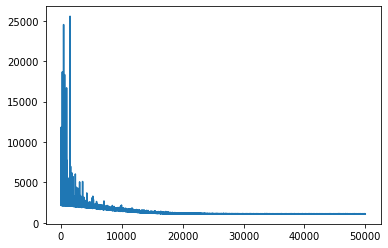

In [39]:

# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

print(y_train.shape)

# train set, input columns
Xs_train = X_train.iloc[:,0:-1].values 
# train set, output column, cost
ys_train = y_train.values.reshape(-1,1) #.iloc[:,-1].values.reshape(-1,1)   

# test set, input columns
Xs_test = X_test.iloc[:,0:-1].values 
# test set, output column, cost
ys_test = y_test#.iloc[:,0:-1].values

# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)

ylog = np.log(ys_train.astype('float'))
# ylog = np.nan_to_num(ylog, copy=True)

yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)


with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])

    

#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [40]:
# samples from the posterior
posterior = approximation.sample(5000)

# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - y_test.values))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - y_test.values) / y_test.values)))

MAE =  37668.56598548709
MAPE =  0.1262699773880866


## Clustering

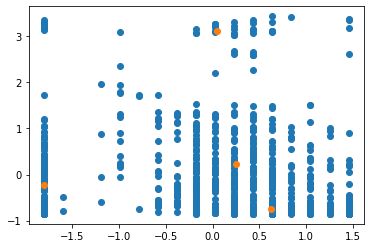

In [41]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
# clustering by features 1, 2
ind=[0,1]
X_ind = np.vstack([Xn_train[:,ind],Xn_test[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1])
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])

In [42]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

def cluster(Xn_train, Xn_test, ys_train, lower_thresh):
  # cluster
  Xn = Xn_train[clusters_train==lower_thresh,:]
  Xtestn = Xn_test[clusters_test==lower_thresh,:]

  ylog = np.log(ys_train.astype('float')[clusters_train==lower_thresh,:])
  # ylog = np.nan_to_num(ylog, copy=True)
  yscaler = StandardScaler().fit(ylog)
  yn = yscaler.transform(ylog)
  return Xn, Xtestn, ylog, yscaler, yn


Xn0 ,Xtestn0 ,ylog0 ,yscaler0, yn0 = cluster(Xn_train, Xn_test, ys_train, 0)
Xn1 ,Xtestn1 ,ylog1 ,yscaler1, yn1 = cluster(Xn_train, Xn_test, ys_train, 1)
Xn2 ,Xtestn2 ,ylog2 ,yscaler2, yn2 = cluster(Xn_train, Xn_test, ys_train, 2)
Xn3 ,Xtestn3 ,ylog3 ,yscaler3, yn3 = cluster(Xn_train, Xn_test, ys_train, 3)

## Piecewise Model

In [43]:
def run_model(Xn ,Xtestn ,ylog ,yscaler, yn):
  with pm.Model() as model_0:
    # prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    # we have a beta for each column of Xn0
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn.shape[1])
    # prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    # linear regression relationship
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn.T)
    # likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn[:,0])

  with model_0:
    # iterations of the algorithm
    approximation = pm.fit(40000,method='advi')

  # samples from the posterior   
  posterior = approximation.sample(5000)
  return posterior

posterior0 = run_model(Xn0 ,Xtestn0 ,ylog0 ,yscaler0, yn0)
posterior1 = run_model(Xn1 ,Xtestn1 ,ylog1 ,yscaler1, yn1)
posterior2 = run_model(Xn2 ,Xtestn2 ,ylog2 ,yscaler2, yn2)
posterior3 = run_model(Xn3 ,Xtestn3 ,ylog3 ,yscaler3, yn3)

Finished [100%]: Average Loss = 607.33


Finished [100%]: Average Loss = 425.11


Finished [100%]: Average Loss = 560.09


Finished [100%]: Average Loss = 239.39


In [44]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

def plot_simulation(Ypred, ylog):
  for i in range(Ypred.shape[0]):
      az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
  az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
  #plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
  plt.xlim([8,16])
  az.plot_dist(ylog,label='true observations');
  plt.legend()
  plt.xlabel("log(y) - output variable")
  plt.ylabel("density plot");

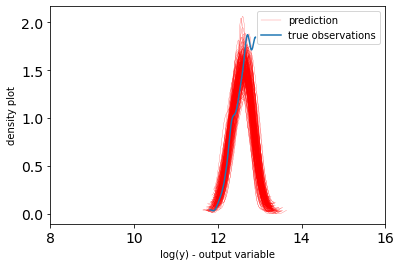

In [45]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
plot_simulation(Ypred0, ylog0)


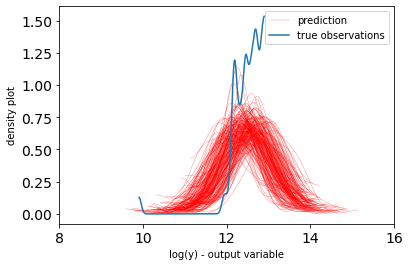

In [46]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
plot_simulation(Ypred1, ylog1)

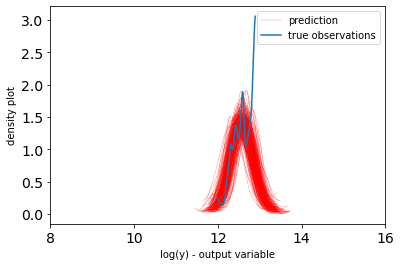

In [47]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
plot_simulation(Ypred2, ylog2)

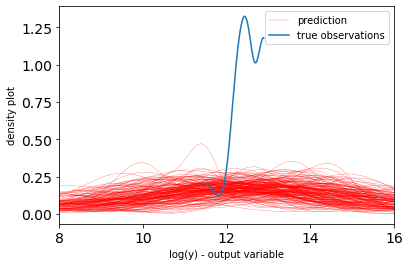

In [48]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
plot_simulation(Ypred3, ylog3)

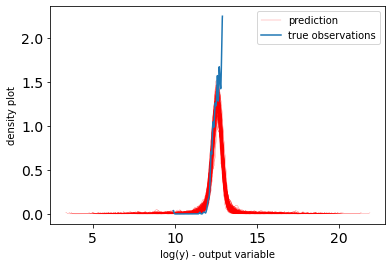

In [49]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

In [50]:
display(y_test)

1270    375000.0
643     250000.0
1509    275000.0
1132    295000.0
1297    270000.0
          ...   
302     390000.0
1360    265000.0
1306    290000.0
102     350000.0
1576    325000.0
Name: Price, Length: 171, dtype: float64

In [51]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("Size Cluster0", np.sum(clusters_test==0), ", MAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - y_test.values[clusters_test==0]))))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("Size Cluster1", np.sum(clusters_test==1), ", MAE Cluster1=",
      (np.mean(abs(y_pred_BLR1 - y_test.values[clusters_test==1]))))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("Size Cluster2", np.sum(clusters_test==2), ", MAE Cluster2=",
      (np.mean(abs(y_pred_BLR2 - y_test.values[clusters_test==2]))))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("Size Cluster3", np.sum(clusters_test==3), ", MAE Cluster3=",
      (np.mean(abs(y_pred_BLR3 - y_test.values[clusters_test==3]))))

# joint
joint=np.hstack([abs(y_pred_BLR0 - y_test.values[clusters_test==0]),
                 abs(y_pred_BLR1 - y_test.values[clusters_test==1]),
                 abs(y_pred_BLR2 - y_test.values[clusters_test==2]),
                 abs(y_pred_BLR3 - y_test.values[clusters_test==3])])

# MAE
print("MAE=",np.mean(joint))

Size Cluster0 63 , MAE Cluster0= 27658.452165260285
Size Cluster1 40 , MAE Cluster1= 48241.263147081816
Size Cluster2 60 , MAE Cluster2= 32153.732851886347
Size Cluster3 8 , MAE Cluster3= 54369.32475611407
MAE= 35300.06772781733


(10.0, 16.0)

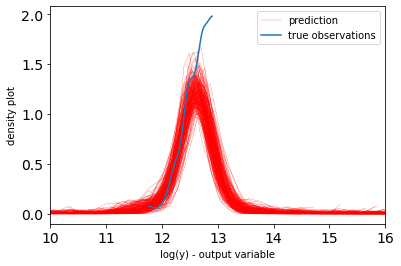

In [52]:
## Posterior predictive checks (PPCs)

num_samples2 = 200
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xtestn0, nsamples=num_samples2)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xtestn1, nsamples=num_samples2)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xtestn2, nsamples=num_samples2)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xtestn3, nsamples=num_samples2)

# Stack arrays in sequence horizontally (column wise)
Ypred = np.hstack([yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
az.plot_dist(np.log(y_test),label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.xlim(10, 16)

#### Piecewise Model Summary

This Piecewise Regression has garnered OK results, compared to the results from Etivity-2 using a similar model.

The MAE has dropped from \~152000 to \~35300, which is a substantial drop (about a factor of 5).

Tis model includes more features than previous week's. A noteable inclusion is the one-hot-encoded Locations.

However it is still not obvious what has allowed for this marked improvement in average magnitude of the errors (MAE).

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [65]:
# your code here
bnn_df = df.drop(['Description', 'Features'], axis=1)
X = pwr_df.drop("Price", axis = 1)
y = pwr_df["Price"]
bnn_df.info(verbose=True)

print('Number of nan in dataset: ',X.isnull().sum().sum())
print('Number of nan in dataset: ',y.isnull().sum().sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 0 to 1637
Data columns (total 59 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   BER_class                           852 non-null    float64
 1   Dist_from_dub_center                852 non-null    float64
 2   Latitude                            852 non-null    float64
 3   Location_Artane                     852 non-null    uint8  
 4   Location_Balbriggan                 852 non-null    uint8  
 5   Location_Ballsbridge                852 non-null    uint8  
 6   Location_Blackrock                  852 non-null    uint8  
 7   Location_Castleknock                852 non-null    uint8  
 8   Location_Clondalkin                 852 non-null    uint8  
 9   Location_Clonsilla                  852 non-null    uint8  
 10  Location_Clontarf                   852 non-null    uint8  
 11  Location_Dalkey                     852 non-

In [66]:
# https://theano-pymc.readthedocs.io/en/latest/
import theano

# add a column of ones to include an intercept in the model
x1 = np.hstack([np.ones((Xn_train.shape[0],1)), Xn_train])
floatX = theano.config.floatX

l = 15
# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', yn_train)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=1,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=1,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output[:,0])

Only 50 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w_0, w_1]


Sampling 1 chain for 500 tune and 50 draw iterations (500 + 50 draws total) took 109 seconds.


Finished [100%]: Average Loss = 886.55


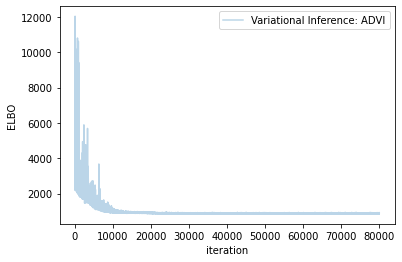

In [67]:
# some parameters
par1 = 50  
par2 = 500 

# neural network
with neural_network:
    posterior = pm.sample(par1,tune=par2,chains=1)

# we can do instead an approximated inference
param3 = 80000 # start with 1000, then use 50000+
VI = 'advi'  # 'advi', 'fullrank_advi', 'svgd', 'asvgd', 'nfvi'
OP = pm.adam # pm.adam, pm.sgd, pm.adagrad, pm.adagrad_window, pm.adadelta
LR = 0.0008    

with neural_network:
    approx = pm.fit(param3, method=VI, obj_optimizer=pm.adam(learning_rate=LR))

# plot 
pb.plot(approx.hist, label='Variational Inference: '+ VI.upper(), alpha=.3)
pb.legend(loc='upper right')
pb.ylabel('ELBO')
pb.xlabel('iteration');


# draw samples from variational posterior
D = 300
posterior = approx.sample(draws=D)

In [68]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_test.shape[0],1)), Xn_test])
y_final_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_final_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_final_pred = np.array(y_final_pred).mean(axis=0)


#We need to do the inverse transformation and scaling that was carried out on the y values at the start
y_val_pred_final = np.exp(yscaler.inverse_transform(y_final_pred))

print("MAE = ",(np.mean(abs(y_val_pred_final - ys_test))))
print("MAPE = ",(np.mean(abs(y_val_pred_final - ys_test) / ys_test)))

MAE =  38102.662492205316
MAPE =  0.13609128509041524


In [69]:
y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred).mean(axis=0)

#### Bayesian Summary

This Bayesian model has performed similarly in MAE (~38000) to the Piecewise model.


# Overall Summary

This was a challenging Etivity due to the volume of work and model prep which was required.
I found that preparing the Piecewise and the Bayesian Model's performed similarly throughout and suffred from similar issues regarding data-preparation.

The Bayesian model was particularly time consuming due to the number of feature included in the dataset. This resulted in the removal of rare **Location** columns, for example.

I made a concerted effort to do lots of refactoring and to keep my function names explicit and self explanatory, as it reduces the need for long exposition regarding data-prep, etc.

Given more time, I would have spent longer on the analysis of the results, as I only have the MAE scores currently.
The Piecewise and Bayesian models had similar MAE scores, but it would have been interesting to see how other metrics compared.
